# Neural Network Demo

## Loading Data

We'll demo this Vanilla Neural Network on MNIST Data. First things first, we want to load our MNIST Data

In [1]:
from DataLoader import *

# load up data
loader = DataLoader()
loader.load_trainval()
loader.load_test()

# retrieve loaded data
train = loader.get_train()
val = loader.get_val()
test = loader.get_test()

# test by printing first training image
row1 = train['data'][0]
for row in range(28):
    for col in range(28):
        print(' ' if row1[28*row+col] == 0 else '+', end='')
    print('')

                            
                            
                            
                            
                            
            ++++++++++++    
        ++++++++++++++++    
       ++++++++++++++++     
       +++++++++++          
        +++++++ ++          
         +++++              
           ++++             
           ++++             
            ++++++          
             ++++++         
              ++++++        
               +++++        
                 ++++       
              +++++++       
            ++++++++        
          +++++++++         
        ++++++++++          
      ++++++++++            
    ++++++++++              
    ++++++++                
                            
                            
                            


## Building the Neural Network

Now that we have our data, we can build a simple vanila neural network.

In [2]:
from Net import *

num_inputs = 784
num_outputs = 10

net = Net([num_inputs, 500, 250, 50, num_outputs])

Initializing weights... Done


## Training the Neural Network on SGD

We'll start of by demoing and testing SGD. We'll build a train function, applying the SGD optimizer. For now, we'll just use a batch size of 1.

In [5]:
from Optimizers import *

loss = []

def train_net(epochs, lr, decay):
    sgd = SGD(lr, decay)
    
    for epoch in range(epochs):
        print('Epoch ' + str(epoch) + '...')
        
        net(train['data'])
        grad, upstreams, dgammas, dbetas = net.backward(train['label'])
        
        for n in range(len(net.layers) - 2, -1, -1):
            if isinstance(net.layers[n], Linear) or isinstance(net.layers[n], BatchNorm):
                net.layers[n].update(sgd)
                
        sgd.advance()
        
        avg_loss = net.xent(train['label'])
        loss.append(avg_loss)
            
        print('Loss for Epoch ' + str(epoch) + ': ' + str(avg_loss))

In [15]:
num_epoch = 10
lr = 0.001
decay = 1e-3

train_net(num_epoch, lr, decay)

Epoch 0...
Loss for Epoch 0: 0.7930950888246678
Epoch 1...
Loss for Epoch 1: 0.7826263821544559
Epoch 2...
Loss for Epoch 2: 0.7723314921131639
Epoch 3...
Loss for Epoch 3: 0.7621698834010088
Epoch 4...
Loss for Epoch 4: 0.7521070610615352
Epoch 5...
Loss for Epoch 5: 0.7421282426956646
Epoch 6...
Loss for Epoch 6: 0.7322664031029632
Epoch 7...
Loss for Epoch 7: 0.7225379649377093
Epoch 8...
Loss for Epoch 8: 0.7129801008282857
Epoch 9...
Loss for Epoch 9: 0.7036458377688369


In [16]:
val_accuracy = 0
        
output = np.argmax(net(val['data']), axis=1)
for entry in range(len(output)):
    if output[entry] == val['label'][entry]:
        val_accuracy += 1
        
val_accuracy /= len(val['data'])
print('Validation Accuracy: ' + str(val_accuracy))

Validation Accuracy: 0.80025


In [17]:
test_accuracy = 0

output = np.argmax(net(test['data']), axis=1)
for entry in range(len(output)):
    if output[entry] == test['label'][entry]:
        test_accuracy += 1
        
test_accuracy /= len(test['data'])
print('Test Accuracy: ' + str(test_accuracy))

Test Accuracy: 0.8109


In [18]:
test_data = test['data']
n = len(test_data)

for k in range(0, 3):
    for i in range(28):
        for j in range(28):
            print(' ' if test_data[k][28*i+j] == 0 else '+', end='')
        print()

    print('Label: ' + str(np.argmax(net(test_data)[k])))

                            
                            
                            
                            
                            
                            
                            
      ++++++                
      ++++++++++++++++      
      ++++++++++++++++      
           +++++++++++      
                  ++++      
                 ++++       
                 ++++       
                ++++        
                ++++        
               ++++         
               +++          
              ++++          
             ++++           
            +++++           
            ++++            
           +++++            
           ++++             
          +++++             
          +++++             
          ++++              
                            
Label: 7
                            
                            
                            
          +++++++           
         +++++++++          
        ++++++++++          
     

## Learning Curve
Since we have a set of losses over our iterations, we can look at and analyze a learning curve.

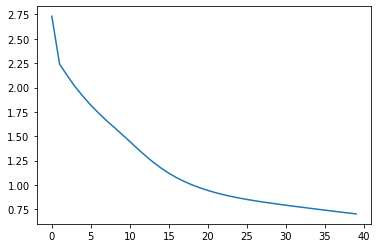

In [19]:
import matplotlib.pyplot as plt

plt.plot(loss)
plt.show()